## 1. Libraries

In [64]:
library(janitor, help, pos = 2, lib.loc = NULL)
library(tidyverse, help, pos = 2, lib.loc = NULL)
library(klaR, help, pos = 2, lib.loc = NULL) # For NAIVE BAYES
library(ggcorrplot) # FOR CORR MATRIX PLOT
library(MASS, help, pos = 2, lib.loc = NULL) # FOR LDA AND QDA
library(nnet, help, pos = 2, lib.loc = NULL) # FOR logistic
library(pROC, help, pos = 2, lib.loc = NULL)

## 2. Read data

In [22]:
SAheart <- read.csv(file="datasets/SAheart.csv")
SAheart <- SAheart |>
    mutate(famhist = factor(famhist, levels=c("Absent", "Present")))

SAheart <- SAheart |>
    mutate(chd = factor(chd, levels=c(0, 1)))
head(SAheart, 10)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
,<int>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<dbl>,<dbl>,<int>,<fct>
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
6,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
7,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
8,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1
9,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0


## 3. Logistic Regression

In [23]:
out_md <- glm(formula = chd ~ sbp + tobacco + ldl + famhist, data=SAheart, family=binomial)

In [24]:
summary(out_md)


Call:
glm(formula = chd ~ sbp + tobacco + ldl + famhist, family = binomial, 
    data = SAheart)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7698  -0.8126  -0.5431   0.9660   2.2455  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -4.252750   0.778578  -5.462 4.70e-08 ***
sbp             0.011982   0.005317   2.253 0.024234 *  
tobacco         0.118880   0.024727   4.808 1.53e-06 ***
ldl             0.203350   0.053841   3.777 0.000159 ***
famhistPresent  1.050498   0.218629   4.805 1.55e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 596.11  on 461  degrees of freedom
Residual deviance: 502.17  on 457  degrees of freedom
AIC: 512.17

Number of Fisher Scoring iterations: 4


In [25]:
new_data <- tibble(sbp = c(115, 145, 125, 135),
                   tobacco = c(1, 8, 2, 5),
                   ldl = c(3, 9, 6, 8),
                   famhist = factor(c("Absent", "Absent", "Present", "Present"),
                                    levels = c("Absent", "Present")))
new_data_df <- as.data.frame(new_data)
predicted_prob <- predict(out_md, newdata = new_data_df, type = "response")
predicted_df <- as.data.frame(predicted_prob)
print(predicted_df)

  predicted_prob
1      0.1047200
2      0.5660823
3      0.4386619
4      0.6539774


In [26]:
pred_prob <- predict(out_md, newdata = new_data, type = "response")
predictions = ifelse(pred_prob > 0.5, "diseased", "non-diseased")
predictions = as.data.frame(predictions)
print(predictions)

   predictions
1 non-diseased
2     diseased
3 non-diseased
4     diseased


### Thực hành 1:

Xây dựng mô hình với những biến khác trong dữ liệu.

## 4. Naive Bayes

Cú pháp:

```r
NaiveBayes(y ~ x1 + x2 + ..., data = ..., usekernel = FALSE)
```

trong đó
• `formula` = y ∼ x1 + x2 + ... là biểu thức tuyến tính của mô hình, với y là tên của biến đáp ứng
(gồm 2 hoặc nhiều nhóm), x1 và x2 lần lượt là tên của các biến giải thích;

• `data` là tên của bộ dữ liệu chứa các biến cần cho việc ước lượng mô hình;

• `usekernel` là lựa chọn ước lượng kernel cho hàm mật độ, mặc định là FALSE tức là ước lượng mật độ
của phân phối chuẩn sẽ được áp dụng; nếu chọn TRUE thì ước lượng mật độ kernel được áp dụng.

In [27]:
out_md_NB <- NaiveBayes(formula = chd ~ sbp + tobacco + ldl + famhist,
data = SAheart)

In [28]:
new_data <- tibble(sbp = c(115, 145, 125, 135),
                tobacco = c(1, 8, 2, 5),
                ldl = c(3, 9, 6, 8),
                famhist = factor(c("Absent", "Absent", "Present", "Present"),
                levels = c("Absent", "Present")))
pred_out_md_NB <- as.data.frame(predict(out_md_NB, newdata = new_data))
print(pred_out_md_NB)

  class posterior.0 posterior.1
1     0   0.9390189  0.06098106
2     1   0.2797191  0.72028085
3     0   0.6994431  0.30055686
4     1   0.3695696  0.63043037


### Thực hành 2:

Áp dụng ước lượng mật độ kernel cho mô hình Naive Bayes, so sánh kết quả.

In [29]:
out_md_NB <- NaiveBayes(formula = chd ~ sbp + tobacco + ldl + famhist,
data = SAheart, usekernel=TRUE)

new_data <- tibble(sbp = c(115, 145, 125, 135),
                tobacco = c(1, 8, 2, 5),
                ldl = c(3, 9, 6, 8),
                famhist = factor(c("Absent", "Absent", "Present", "Present"),
                levels = c("Absent", "Present")))
pred_out_md_NB <- as.data.frame(predict(out_md_NB, newdata = new_data))
print(pred_out_md_NB)

  class posterior.0 posterior.1
1     0   0.9459570  0.05404303
2     1   0.2722421  0.72775787
3     0   0.5041031  0.49589685
4     1   0.3760453  0.62395469


### Thực hành 3:

Xây dựng mô hình với các biến khác trong dữ liệu.

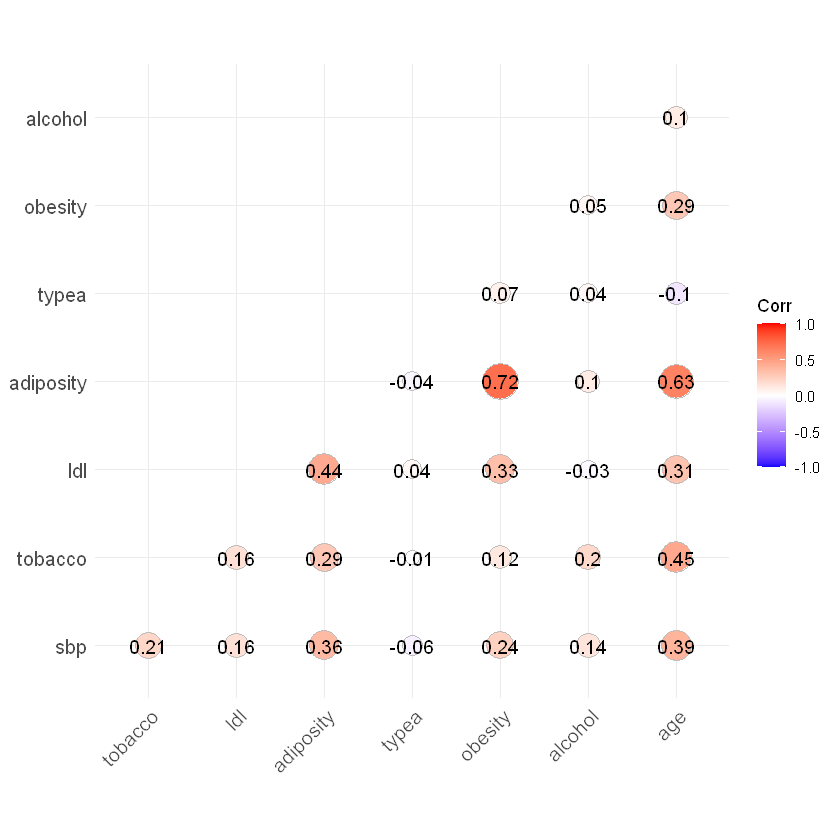

In [31]:
# Calculate the correlation matrix
cor_matrix <- cor(SAheart[, sapply(SAheart, is.numeric)])

# Plot the correlation matrix
ggcorrplot(cor_matrix, method = "circle", type = "lower", lab = TRUE)

In [37]:
out_md_NB <- NaiveBayes(formula = chd ~ typea + alcohol + ldl + tobacco,
data = SAheart, usekernel=TRUE)

new_data <- tibble(typea = c(49, 55, 52, 51),
                alcohol = c(97.2, 2.06, 3.81, 24.26),
                ldl = c(5.73, 4.41, 3.48, 6.41),
                tobacco = c(12, 0.01, 0.08, 7.50))
pred_out_md_NB <- as.data.frame(predict(out_md_NB, newdata = new_data))
print(pred_out_md_NB)

  class posterior.0 posterior.1
1     1   0.2305405   0.7694595
2     0   0.8837615   0.1162385
3     0   0.9195655   0.0804345
4     1   0.3910468   0.6089532


Kết quả dự đoán đúng là 75%

### 5. Phân loại LDA và QDA

Cú pháp:

```r
lda(y ~ x1 + x2 + ..., data = ...)
```

và

```r
qda(y ~ x1 + x2 + ..., data = ...)
```

In [ ]:
out_md_LDA <- lda(formula = chd ~ sbp + tobacco + ldl + famhist,
data = SAheart)

In [40]:
out_md_LDA

Call:
lda(chd ~ sbp + tobacco + ldl + famhist, data = SAheart)

Prior probabilities of groups:
        0         1 
0.6536797 0.3463203 

Group means:
       sbp  tobacco      ldl famhistPresent
0 135.4603 2.634735 4.344238      0.3178808
1 143.7375 5.524875 5.487938      0.6000000

Coefficients of linear discriminants:
                     LD1
sbp            0.0119491
tobacco        0.1278937
ldl            0.2152361
famhistPresent 1.1032934

In [43]:
new_data <- tibble(sbp = c(115, 145, 125, 135),
                tobacco = c(1, 8, 2, 5),
                ldl = c(3, 9, 6, 8),
                famhist = factor(c("Absent", "Absent", "Present", "Present"),
                levels = c("Absent", "Present")))
pred_out_md_LDA <- as.data.frame(predict(out_md_LDA, newdata = new_data)$posterior)
print(pred_out_md_LDA)

          0          1
1 0.9075048 0.09249518
2 0.4188052 0.58119476
3 0.5585615 0.44143848
4 0.3268301 0.67316992


### Thực hành 4:

Xây dựng mô hình QDA với các biến được sử dụng trong ví dụ 1.

In [44]:
out_md_qda <- qda(formula = chd ~ sbp + tobacco + ldl + famhist,
data = SAheart)

In [45]:
new_data <- tibble(sbp = c(115, 145, 125, 135),
                tobacco = c(1, 8, 2, 5),
                ldl = c(3, 9, 6, 8),
                famhist = factor(c("Absent", "Absent", "Present", "Present"),
                levels = c("Absent", "Present")))
pred_out_md_QDA <- as.data.frame(predict(out_md_qda, newdata = new_data)$posterior)
print(pred_out_md_LDA)

          0          1
1 0.9075048 0.09249518
2 0.4188052 0.58119476
3 0.5585615 0.44143848
4 0.3268301 0.67316992


### Thực hành 5:

Xây dựng mô hình **LDA** và **QDA** với các biến khác trong dữ liệu.

In [50]:
out_md_lda = lda(formula = chd ~ typea + alcohol + ldl + tobacco, data=SAheart)
out_md_qda = qda(formula = chd ~ typea + alcohol + ldl + tobacco, data=SAheart)

new_data <- tibble(typea = c(49, 55, 52, 51),
                alcohol = c(97.2, 2.06, 3.81, 24.26),
                ldl = c(5.73, 4.41, 3.48, 6.41),
                tobacco = c(12, 0.01, 0.08, 7.50))

pred_out_md_lda <- as.data.frame(predict(out_md_lda, newdata = new_data)$posterior)
pred_out_md_qda <- as.data.frame(predict(out_md_qda, newdata = new_data)$posterior)

print("LDA:")
print(pred_out_md_lda)
print("QDA:")
print(pred_out_md_qda)

[1] "LDA:"
          0         1
1 0.3343283 0.6656717
2 0.7895629 0.2104371
3 0.8351443 0.1648557
4 0.4545361 0.5454639
[1] "QDA:"
          0          1
1 0.1445615 0.85543850
2 0.8574973 0.14250272
3 0.9036542 0.09634579
4 0.5968697 0.40313029


## 6.  Mô hình multinominal logistic

Cú pháp:

```r
multinom(y ~ x1 + x2 + ..., data = ..., maxit = 100)
```

In [51]:
data("iris")
iris <- iris |> janitor::clean_names()
glimpse(iris)

Rows: 150
Columns: 5
$ sepal_length <dbl> 5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.~
$ sepal_width  <dbl> 3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.~
$ petal_length <dbl> 1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.~
$ petal_width  <dbl> 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.~
$ species      <fct> setosa, setosa, setosa, setosa, setosa, setosa, setosa, s~


In [54]:
out_iris_mlogit <- multinom(species ~ sepal_length + sepal_width, data = iris,
maxit = 1500)

# weights:  12 (6 variable)
initial  value 164.791843 
iter  10 value 62.715967
iter  20 value 59.808291
iter  30 value 55.445984
iter  40 value 55.375704
iter  50 value 55.346472
iter  60 value 55.301707
iter  70 value 55.253532
iter  80 value 55.243230
iter  90 value 55.230241
iter 100 value 55.212479
iter 110 value 55.202443
iter 120 value 55.192705
iter 130 value 55.191200
iter 140 value 55.191033
iter 150 value 55.190191
iter 160 value 55.189448
iter 170 value 55.188985
iter 180 value 55.188556
iter 190 value 55.187777
iter 200 value 55.187265
iter 210 value 55.186957
iter 220 value 55.186595
final  value 55.185249 
converged


In [55]:
summary(out_iris_mlogit)

Call:
multinom(formula = species ~ sepal_length + sepal_width, data = iris, 
    maxit = 1500)

Coefficients:
           (Intercept) sepal_length sepal_width
versicolor   -105.7787     41.81093   -37.79796
virginica    -118.8205     43.71278   -37.39364

Std. Errors:
           (Intercept) sepal_length sepal_width
versicolor    19.77263     17.56242    41.60040
virginica     19.81677     17.55754    41.60719

Residual Deviance: 110.3705 
AIC: 122.3705 

In [56]:
new_data_iris <- tibble(sepal_length = c(4.8, 6, 6.7, 5.6),
                        sepal_width = c(3, 3.2, 4.3, 2.8),
                        petal_length = c(1, 3.9, 5.3, 4.5),
                        petal_width = c(0.4, 1.4, 2.4, 0.7))
out_prob_mlogit_iris <- predict(out_iris_mlogit, newdata = new_data_iris,
type = "probs")
out_prob_mlogit_iris

,setosa,versicolor,virginica
1,1.000000e+00,9.422496e-09,6.332977e-10
2,1.927510e-11,5.834194e-01,4.165806e-01
3,1.405305e-06,1.916651e-01,8.083335e-01
4,1.281222e-10,7.789050e-01,2.210950e-01


In [57]:
out_class_mlogit_iris <- predict(out_iris_mlogit, newdata = new_data_iris,
                                type = "class")
out_class_mlogit_iris

[1] setosa     versicolor virginica  versicolor
Levels: setosa versicolor virginica

### Thực hành 6:

Xây dựng mô hình phân loại loài hoa iris bằng Naive Bayes, LDA và QDA, sử dụng hai biến như trong ví dụ, và so sánh với kết quả tiên đoán.

In [58]:
out_md_NB <- NaiveBayes(formula = species ~ sepal_length + sepal_width, data = iris)
out_md_lda <- lda(formula = species ~ sepal_length + sepal_width, data = iris)
out_md_qda <- qda(formula = species ~ sepal_length + sepal_width, data = iris)

new_data_iris <- tibble(sepal_length = c(4.8, 6, 6.7, 5.6),
                        sepal_width = c(3, 3.2, 4.3, 2.8),
                        petal_length = c(1, 3.9, 5.3, 4.5),
                        petal_width = c(0.4, 1.4, 2.4, 0.7))

NB_predictions <- as.data.frame(predict(out_md_NB, newdata = new_data_iris)$posterior)
LDA_predictions <- as.data.frame(predict(out_md_lda, newdata = new_data_iris)$posterior)
QDA_predictions <- as.data.frame(predict(out_md_qda, newdata = new_data_iris)$posterior)

print("NB:")
print(NB_predictions)
print("LDA:")
print(LDA_predictions)
print("QDA:")
print(QDA_predictions)

[1] "NB:"
       setosa versicolor  virginica
1 0.866877931 0.10887699 0.02424508
2 0.023430528 0.47911633 0.49745314
3 0.004913586 0.01362033 0.98146608
4 0.068540973 0.74304334 0.18841568
[1] "LDA:"
       setosa  versicolor    virginica
1 0.980958325 0.018618011 0.0004236647
2 0.037873292 0.656934739 0.3051919686
3 0.976338242 0.007815111 0.0158466463
4 0.008974751 0.834700742 0.1563245073
[1] "QDA:"
        setosa versicolor  virginica
1 9.844493e-01 0.00976027 0.00579039
2 1.666116e-05 0.57960580 0.42037754
3 7.925197e-02 0.09779146 0.82295657
4 3.226889e-05 0.76160578 0.23836195


### Thực hành 7:

Xây dựng mô hình phân loại loài hoa iris bằng multinomial logistic model, Naive Bayes, LDA và QDA, sử dụng hai biến còn lại và cả 4 biến; và so sánh với kết quả tiên đoán.

In [60]:
out_md_logistic <- multinom(species ~ ., data=iris, maxit=1500)
out_md_NB <- NaiveBayes(species ~ ., data=iris)
out_md_lda <- lda(species ~ ., data=iris)
out_md_qda <- qda(species ~ ., data=iris)

new_data_iris <- tibble(sepal_length = c(4.8, 6, 6.7, 5.6),
                        sepal_width = c(3, 3.2, 4.3, 2.8),
                        petal_length = c(1, 3.9, 5.3, 4.5),
                        petal_width = c(0.4, 1.4, 2.4, 0.7))

LG_predictions <- as.data.frame(predict(out_md_logistic, newdata=new_data_iris, type = "class"))
NB_predictions <- as.data.frame(predict(out_md_NB, newdata = new_data_iris)$posterior)
LDA_predictions <- as.data.frame(predict(out_md_lda, newdata = new_data_iris)$posterior)
QDA_predictions <- as.data.frame(predict(out_md_qda, newdata = new_data_iris)$posterior)

print("Logistic:")
print(LG_predictions)
print("NB:")
print(NB_predictions)
print("LDA:")
print(LDA_predictions)
print("QDA:")
print(QDA_predictions)

# weights:  18 (10 variable)
initial  value 164.791843 
iter  10 value 16.177348
iter  20 value 7.111438
iter  30 value 6.182999
iter  40 value 5.984028
iter  50 value 5.961278
iter  60 value 5.954900
iter  70 value 5.951851
iter  80 value 5.950343
iter  90 value 5.949904
iter 100 value 5.949867
iter 110 value 5.949850
iter 120 value 5.949821
iter 130 value 5.949767
iter 140 value 5.949743
iter 150 value 5.949722
iter 160 value 5.949686
iter 170 value 5.949424
iter 180 value 5.949393
final  value 5.949363 
converged


[1] "Logistic:"
  predict(out_md_logistic, newdata = new_data_iris, type = "class")
1                                                            setosa
2                                                        versicolor
3                                                         virginica
4                                                        versicolor
[1] "NB:"
         setosa   versicolor    virginica
1  1.000000e+00 1.518639e-15 1.399202e-23
2  5.234287e-70 9.992280e-01 7.719766e-04
3 1.956280e-198 2.158392e-09 1.000000e+00
4  2.635609e-69 9.999625e-01 3.747166e-05
[1] "LDA:"
        setosa   versicolor    virginica
1 1.000000e+00 3.233117e-19 2.848747e-38
2 2.548169e-14 9.999932e-01 6.781498e-06
3 9.855819e-31 6.629787e-04 9.993370e-01
4 6.026724e-17 9.999997e-01 3.171687e-07
[1] "QDA:"
         setosa   versicolor    virginica
1  1.000000e+00 4.559575e-18 5.044014e-35
2  5.962146e-56 9.999871e-01 1.290428e-05
3 2.015739e-147 4.694850e-05 9.999531e-01
4  6.550298e-65 2.317529e-04 

## 7. Đánh giá mô hình phân loại

Cú pháp:

```r
library(pROC)
out_roc <- roc(SAheart$chd ~ prob_pred_dt)

out_roc$auc
```

In [65]:
out_roc <- roc(SAheart$chd ~ prob_pred_dt)

ERROR: Error in eval(predvars, data, env): object 'prob_pred_dt' not found


In [ ]:
out_roc$auc

In [62]:
ci.auc(out_roc, conf.level = 0.95)

ERROR: Error in ci.auc(out_roc, conf.level = 0.95): object 'out_roc' not found
